# Parameter Standardization

## Import Packages

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Threshold Validation

In [4]:
# Sample Data Generation

im = np.ones((4000,4000), dtype = 'uint8')*255
num_obj = 255
obj_num = num_obj
circle_centers = np.linspace(100, 3900, num_obj).astype('int')
intensities = np.random.randint(0, 255, obj_num).astype('int')
intensities = np.linspace(0, 255, obj_num).astype('int')

for jj in range(len(circle_centers)):
    cv2.circle(im, (circle_centers[jj], circle_centers[jj]), 8, int(intensities[jj]), -1)

In [5]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 50
params.maxThreshold = 150
params.filterByArea = True
params.minArea = 1
detector = cv2.SimpleBlobDetector_create(params)

wo = []
from tqdm import tqdm
for jj in tqdm(range(255)):
    ret, img2 = cv2.threshold(im, intensities[jj], 255, cv2.THRESH_BINARY)
    c = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, np.ones((3,3)), iterations = 1)
    d = cv2.erode(c, np.ones((1,1)), iterations = 1)
    counts = len(detector.detect(d))
    wo.append(counts)
    #print(counts)


#plt.imshow(img2)

100%|████████████████████████████████████████████████████████████████████████████████| 255/255 [01:49<00:00,  2.33it/s]


In [6]:
# OpenCFU Data
ocfuTH = np.asarray(pd.read_csv('tuy2.csv')).astype('int')

# ImageJ Data
imagej = np.linspace(0,255,255)+0.5 #simulated data...but is exactly accurate to the raw data

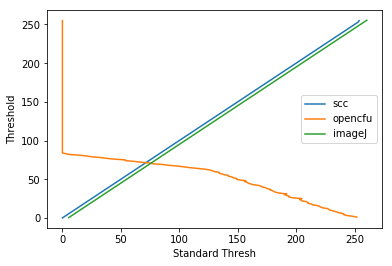

In [7]:
# Visualize Results

plt.plot(np.sort(wo), intensities)
plt.plot(ocfuTH[:,1], ocfuTH[:,0])
plt.plot(imagej+5, imagej) # "+5" for visualization purposes

plt.xlabel('Standard Thresh')
plt.ylabel('Threshold')
plt.gca().legend(('scc', 'opencfu', 'imageJ'))
plt.show()

##### Conclusion: Thresholds for SCC and ImageJ are exactly the same...OpenCFU goes the opposite way. To interpret this...select a threshold value and find it on the x-axis...Then, find the y-axis value for each algorithm, and this gives the appropriate threshold for said algorithm...For example, if I was to select 112 as a threshold, the SCC and ImageJ threshold would also be 112...but, for OpenCFU, the threshold would be approximately 64

##### This avoids the need for threshold optimization and validation

## Radius/Size Validation

In [187]:
# Sample Data Generation

sizes = np.linspace(1, 50, 50).astype('int')
area = (np.square(sizes)*3.14).astype('int')

for jj in range(len(sizes)):  
    im = np.ones((1000,1000), dtype = 'uint8')*255
    num_obj = 255
    obj_num = num_obj
    circle_centers = (500,500)
    cv2.circle(im, (circle_centers), sizes[jj], 0, -1)
    im = cv2.medianBlur(im, 15)
    #plt.imshow(im)
    #save_path = r'C:\Users\anees\Desktop\SimpylCellCounter\samples\validation\sizes\size'+str(jj)+'.jpg'
    #cv2.imwrite(save_path, im)
    

In [ ]:
# SCC Data
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 50
params.maxThreshold = 150
params.filterByArea = False
params.minArea = 0
detector = cv2.SimpleBlobDetector_create(params)

sccwo = []
from tqdm import tqdm
for jj in range(len(sizes)):
    
    im = np.ones((1000,1000), dtype = 'uint8')*255
    num_obj = 255
    obj_num = num_obj
    circle_centers = (500,500)
    cv2.circle(im, (circle_centers), sizes[jj], 0, -1)    
    
    ret, img2 = cv2.threshold(im, 110, 255, cv2.THRESH_BINARY)
    xy = img2==0
    num_b_pix = len(np.where(xy==True)[0])
    sccwo.append(num_b_pix)

sccwo = np.asarray(sccwo).astype('int')

In [193]:
# OpenCFU Data
ocfuSiz = np.asarray(pd.read_csv('tuy.csv')).astype('int')

# ImageJ Data
df = np.asarray(pd.read_csv('Summary.csv'))
imagej = np.sort(df[:,3]).astype('int')

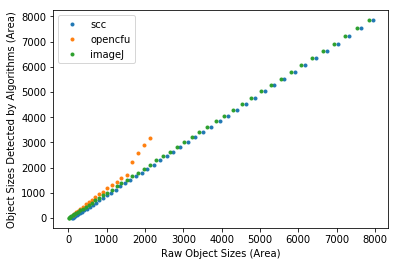

In [194]:
# Visualize Results

plt.plot(area+100, sccwo, '.') # "+100 for visualization purposes"
plt.plot(area[5:26], ocfuSiz[:,0], '.')
plt.plot(area, imagej, '.')
plt.gca().legend(('scc', 'opencfu', 'imageJ'))
plt.xlabel('Raw Object Sizes (Area)')
plt.ylabel('Object Sizes Detected by Algorithms (Area)')
plt.show()

##### Conclusion: For all algorithms (SCC, OpenCFU, and ImageJ), relevant sizes are not different...indicates that this parameter is constant